# Домашнє завдання № 3

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df = pd.read_csv('Housing.csv')

In [26]:
df.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [27]:
df.shape

(545, 13)

#### 1. Напишіть функцію гіпотези лінійної регресії у векторному вигляді

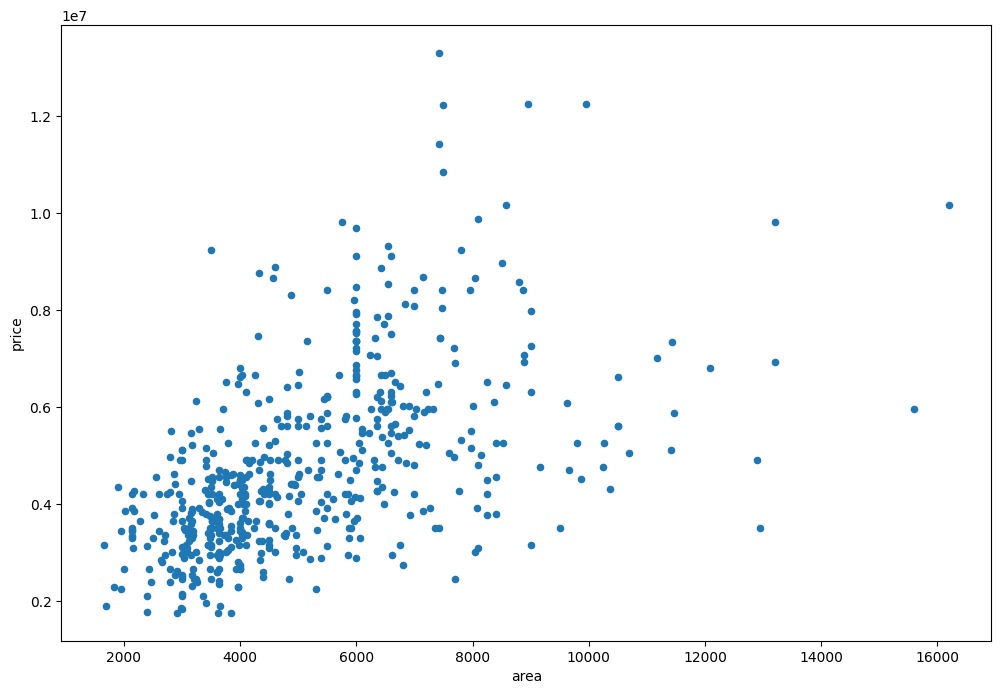

In [28]:
# Побудуємо залежність ціни від площі будинку
df.plot(x='area', y='price', kind='scatter', figsize=(12, 8))
plt.show()

In [29]:
# визначимо кореляцію площі та ціни
df_corr = df[['area', 'price']].corr()
df_corr

,area,price
area,1.000000,0.535997
price,0.535997,1.000000


##### Формула лінійної регресії:
$$h(x) = w_0 + w_1*x$$
##### де x - вхідна змінна; w_0, w_1 - коефіцієнти (ваги)

In [30]:
# Функція лінійної регресії
def h(w_0, w_1, x):
    return w_0 + w_1*x

#### 2. Створіть функцію для обчислення функції втрат у векторному вигляді

In [31]:
def loss_function(w_0, w_1, df):

    n = df.area.shape[0]  # 545
    cost = 0  # сума
    for x, y in zip(df.area, df.price):  # створення пар значень для x, y
        cost = cost + (h(w_0, w_1, x) - y)**2  # "h() - y" - різниця між розрахунковим та реальним результатом
    return cost/(2*n)

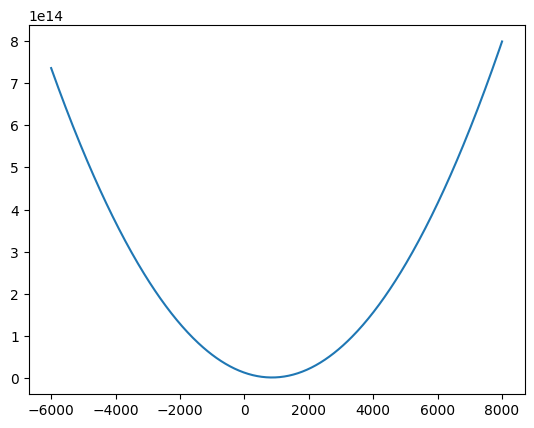

In [32]:
# Відмалюємо функцію втрат (помилок) на площині для заданих ваг
w_0 = 0
w_1 = np.linspace(-6000, 8000, 500)  # створення рівномірного списку з 500 значень від -6000 до 8000
plt.plot(w_1, [loss_function(w_0, w, df) for w in w_1])
plt.show()

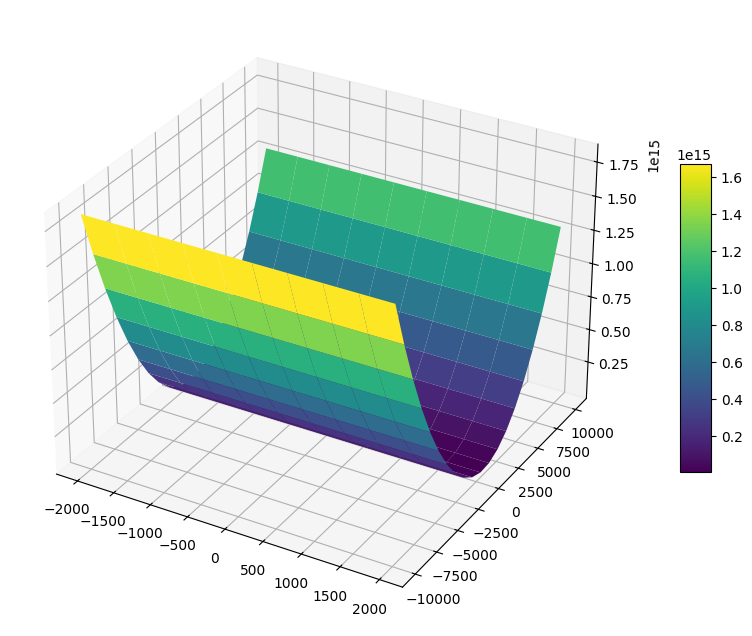

In [33]:
# Відмалюємо цю функцію втрат у тривімирному вигляді
from mpl_toolkits.mplot3d import Axes3D
w_0 = np.linspace(-2000, 2000, 10)  # список значень від -2000 до 2000 (не включно) з кроком 10
w_1 = np.linspace(-10000, 10000, 20)
W0, W1 = np.meshgrid(w_0, w_1)  # створення координатних сіток на основі введених масивів
Z = loss_function(W0, W1, df)
fig = plt.figure(figsize = (14, 8))
ax = fig.add_subplot(111, projection='3d')
surface = ax.plot_surface(W0, W1, Z, cmap='viridis')
fig.colorbar(surface, ax=ax, shrink=0.5, aspect=10)
plt.show()

#### 3. Реалізуйте один крок градієнтного спуску

In [34]:
# Створимо ф-ю, яка буде виконувати один крок градієнтного спуску
def grad_step(weights, grads, learning_rate=0.001):  # grads - градієнти, learning_rate - коеф. навчання
    
    w_0, w_1 = weights
    grad_0, grad_1 = grads
    w_0 = w_0 - learning_rate * grad_0
    w_1 = w_1 - learning_rate * grad_1
    return w_0, w_1

In [35]:
# Створимо ф-ї, які рахуватимуть похідні
def grad_w_0(w_0, w_1, df):

    n = df.area.shape[0]  # 545
    cost = 0  # сума
    for x, y in zip(df.area, df.price):  # створення пар значень для x, y
        cost = cost + (h(w_0, w_1, x) - y)  # "h() - y" - різниця між розрахунковим та реальним результатом
    return cost/n


def grad_w_1(w_0, w_1, df):

    n = df.area.shape[0]  # 545
    cost = 0 
    for x, y in zip(df.area, df.price):  # створення пар значень для x, y
        cost = cost + (h(w_0, w_1, x) - y)*x  # "h() - y" - різниця між розрахунковим та реальним результатом
    return cost/n

In [36]:
# Створимо ф-ю, яка буде робити всі кроки градієнтного спуску
def grad_descent(weights, df, num_iter, learning_rate=0.001, epsilon=0.01):

    # epsilon - значення, при якому спуск зупиняється
    
    w_0, w_1 = weights
    loss = loss_function(w_0, w_1, df)
    loss_history = [loss]
    
    for i in range(num_iter):
        
        # розрахуємо градієнти
        d_w_0 = grad_w_0(w_0, w_1, df)
        d_w_1 = grad_w_1(w_0, w_1, df)
        grads = (d_w_0, d_w_1)
        
        w_0, w_1 = grad_step(weights, grads, learning_rate=learning_rate)  # робимо крок спуску
        weights = (w_0, w_1)
        loss = loss_function(w_0, w_1, df)
        
        if abs(loss-loss_history[-1]) < epsilon:
            loss_history.append(loss)
            break
        
        loss_history.append(loss)

    return weights
    

In [37]:
# тренування моделі
weights, history = grad_descent((0., 0.), df, 1000)

OverflowError: (34, 'Result too large')